
=== SUMMARY TABLE: Pre-test vs Post-test ===
    Group      Mean      STD      SEM  N  Cohen's d
 Pre-test 17.400000 3.124983 0.570541 30        NaN
Post-test 23.433333 2.112089 0.385613 30   2.262165

=== STATISTICAL SUMMARY ===
Mean Pre-test Score: 17.40
Mean Post-test Score: 23.43
Mean Score Difference: 6.03
Mean Percentage Increase: 37.47%

=== PAIRED T-TEST ===
t = 29.269, p = 0.0000
✅ Significant

=== PAIRED SAMPLES CORRELATION ===
Pearson r = 0.981, p = 0.0000
✅ Significant Positive Correlation

=== EFFECT SIZE ===
Cohen's d: 2.26  (Large)

=== 95% CONFIDENCE INTERVAL (Score Difference) ===
CI: 5.61 to 6.45

=== SHAPIRO-WILK NORMALITY TEST ===
p = 0.0000
⚠️ Not Normal (use non-parametric test)

=== WILCOXON SIGNED-RANK TEST ===
W = 0.00, p = 0.0000

=== IMPROVEMENT CATEGORIES ===
≥ 15% Increase: 28/30
≥ 25% Increase: 26/30
≥ 50% Increase: 3/30


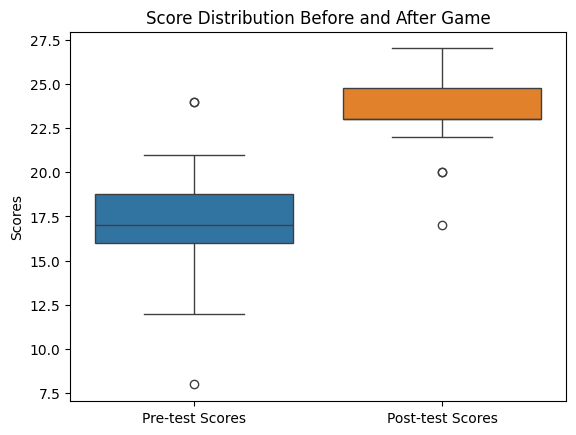

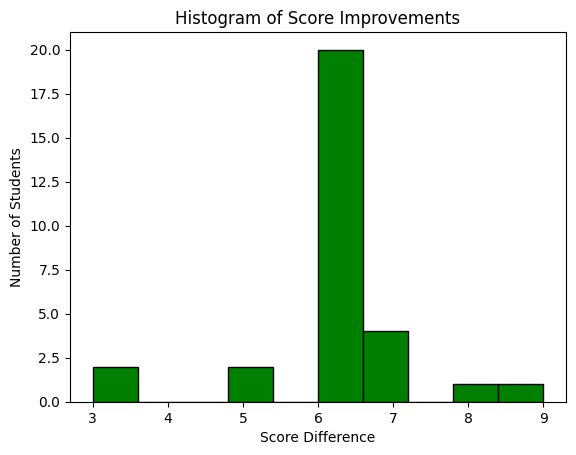

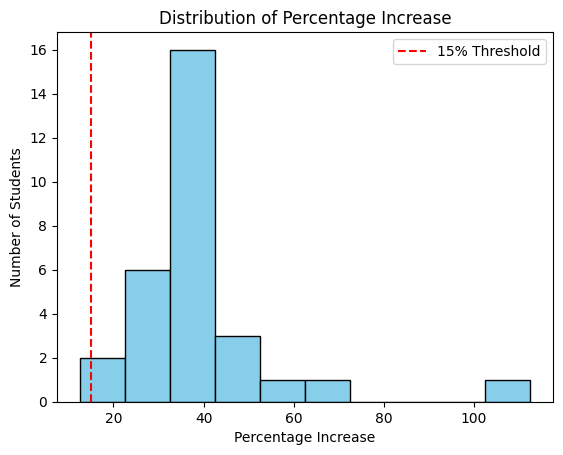

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file
file_path = 'results.xlsx'  # Replace with your actual filename
df = pd.read_excel(file_path)

# Compute differences and percentage increases
df['Score Difference'] = df['Post-test Scores'] - df['Pre-test Scores']
df['Percent Increase'] = (df['Score Difference'] / df['Pre-test Scores']) * 100

# === SUMMARY TABLE: Pre-test and Post-test Stats ===
group_stats = {
    "Group": ["Pre-test", "Post-test"],
    "Mean": [df['Pre-test Scores'].mean(), df['Post-test Scores'].mean()],
    "STD": [df['Pre-test Scores'].std(ddof=1), df['Post-test Scores'].std(ddof=1)],
    "SEM": [df['Pre-test Scores'].sem(ddof=1), df['Post-test Scores'].sem(ddof=1)],
    "N": [len(df), len(df)]
}
summary_df = pd.DataFrame(group_stats)

# Compute Cohen's d
mean_diff = summary_df.loc[1, 'Mean'] - summary_df.loc[0, 'Mean']
pooled_std = np.sqrt(((summary_df.loc[0, 'STD'] ** 2) + (summary_df.loc[1, 'STD'] ** 2)) / 2)
cohen_d = mean_diff / pooled_std
summary_df["Cohen's d"] = [np.nan, cohen_d]  # Cohen's d is only applicable for the paired comparison

print("\n=== SUMMARY TABLE: Pre-test vs Post-test ===")
print(summary_df.to_string(index=False))

# Descriptive statistics
mean_pre = summary_df.loc[0, 'Mean']
mean_post = summary_df.loc[1, 'Mean']
mean_score_diff = df['Score Difference'].mean()
mean_percent = df['Percent Increase'].mean()

# Paired t-test
t_stat, p_value = stats.ttest_rel(df['Post-test Scores'], df['Pre-test Scores'])

# 95% Confidence Interval for score difference
ci = sms.DescrStatsW(df['Score Difference']).tconfint_mean()

# Normality test
shapiro_stat, shapiro_p = stats.shapiro(df['Score Difference'])

# Wilcoxon test (non-parametric)
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(df['Pre-test Scores'], df['Post-test Scores'])

# Paired Samples Correlation
corr_r, corr_p = stats.pearsonr(df['Pre-test Scores'], df['Post-test Scores'])

# Improvement counts
count_15 = (df['Percent Increase'] >= 15).sum()
count_25 = (df['Percent Increase'] >= 25).sum()
count_50 = (df['Percent Increase'] >= 50).sum()
n_students = len(df)

# === OUTPUT ===
print("\n=== STATISTICAL SUMMARY ===")
print(f"Mean Pre-test Score: {mean_pre:.2f}")
print(f"Mean Post-test Score: {mean_post:.2f}")
print(f"Mean Score Difference: {mean_score_diff:.2f}")
print(f"Mean Percentage Increase: {mean_percent:.2f}%")

print("\n=== PAIRED T-TEST ===")
print(f"t = {t_stat:.3f}, p = {p_value:.4f}")
print("✅ Significant" if p_value < 0.05 else "❌ Not Significant")

print("\n=== PAIRED SAMPLES CORRELATION ===")
print(f"Pearson r = {corr_r:.3f}, p = {corr_p:.4f}")
print("✅ Significant Positive Correlation" if corr_p < 0.05 else "❌ Not Significant")

print("\n=== EFFECT SIZE ===")
print(f"Cohen's d: {cohen_d:.2f}  ({'Large' if cohen_d >= 0.8 else 'Medium' if cohen_d >= 0.5 else 'Small'})")

print("\n=== 95% CONFIDENCE INTERVAL (Score Difference) ===")
print(f"CI: {ci[0]:.2f} to {ci[1]:.2f}")

print("\n=== SHAPIRO-WILK NORMALITY TEST ===")
print(f"p = {shapiro_p:.4f}")
print("✅ Normally Distributed" if shapiro_p > 0.05 else "⚠️ Not Normal (use non-parametric test)")

print("\n=== WILCOXON SIGNED-RANK TEST ===")
print(f"W = {wilcoxon_stat:.2f}, p = {wilcoxon_p:.4f}")

print("\n=== IMPROVEMENT CATEGORIES ===")
print(f"≥ 15% Increase: {count_15}/{n_students}")
print(f"≥ 25% Increase: {count_25}/{n_students}")
print(f"≥ 50% Increase: {count_50}/{n_students}")

# === PLOTS ===

# Boxplot
sns.boxplot(data=df[['Pre-test Scores', 'Post-test Scores']])
plt.title('Score Distribution Before and After Game')
plt.ylabel('Scores')
plt.show()

# Histogram: Score Difference
plt.hist(df['Score Difference'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Score Improvements')
plt.xlabel('Score Difference')
plt.ylabel('Number of Students')
plt.show()

# Histogram: Percent Increase
plt.hist(df['Percent Increase'], bins=10, color='skyblue', edgecolor='black')
plt.axvline(15, color='red', linestyle='--', label='15% Threshold')
plt.title('Distribution of Percentage Increase')
plt.xlabel('Percentage Increase')
plt.ylabel('Number of Students')
plt.legend()
plt.show()
